<h1>Data preprocessing</h1>

<h2>Importing necessary modules</h2>

In [63]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold


from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
IPythonConsole.ipython_useSVG=True
from rdkit.Chem import Descriptors


In [3]:
# Define filepath to Molecules_combined.csv.
path = r"Molecules_combined.csv"
# Open the csv file and store the data as a list
csv_file = open(path, 'r')
reader = csv.reader(csv_file)
data = [row for row in reader]


<h2>Create DataFrame containing molecules and descriptors</h2>
<p>Possible to export it as csv file.</p>

In [4]:
# TODO: more sensible variable names?
m = Chem.MolFromSmiles(data[1][0])
vs = Descriptors.CalcMolDescriptors(m)

df_full = pd.DataFrame(vs.items())
df_full.rename(columns={1:data[1][0]},inplace=True)

for i,x in enumerate(data[2:]):
    m = Chem.MolFromSmiles(x[0])
    vs = Descriptors.CalcMolDescriptors(m)
    df_full[x[0]] = vs.values()

df_full.to_csv('descriptors_known_molecs.csv')

C:\Users\20203148\AppData\Local\Temp\ipykernel_10688\3823414456.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_full[x[0]] = vs.values()
C:\Users\20203148\AppData\Local\Temp\ipykernel_10688\3823414456.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_full[x[0]] = vs.values()
C:\Users\20203148\AppData\Local\Temp\ipykernel_10688\3823414456.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all colum

<p>DataFrame has to be read in from previous save, as rest of the program bugs out otherwise :(</p>

In [5]:
df_full = pd.read_csv("descriptors_known_molecs.csv")
df_full.head()

,Unnamed: 0,0,COc1ccccc1CC(NC(C)=O)C(=O)NC1CCN(c2nnnn2-c2ccccc2)CC1,O=C(CSc1nc2cccnc2n1Cc1ccccc1)NCc1ccco1,Cc1cccc2cc(C[NH+](CC3CCCO3)C(c3nnnn3Cc3ccco3)C(C)C)c(O)nc12,CCN(CC)c1ccc2c(Cl)c(Br)c(=O)oc2c1,CS(=O)(=O)N1CCc2cc(-c3csc(NC(=O)Cc4cccs4)n3)ccc21,CC1CCCCN1S(=O)(=O)c1ccc(NC(=O)c2cccc(-n3cnnn3)c2)cc1,COCCN(C(=O)C(F)(F)F)C(C(=O)NC1CCCCC1)c1ccco1,COc1ccccc1N1CCN(C(=O)CSc2nnc(-c3ccoc3C)o2)CC1,...,CCOC(=O)C1(C)C(N=Nc2ccc(S(N)(=O)=O)cc2)=C(O)C(=O)N1c1ccccc1,CC1CCN(C(=O)COc2cccc3c2CCN(Cc2ccccc2)C3=O)CC1,CC1=C(C(=O)Nc2ccccc2C(F)(F)F)C(c2ccc(C)s2)NC(S)=[NH+]1,Cc1cc(C(=O)N/N=C(\CCC(=O)[O-])c2cccs2)c2ccccc2n1,O=C(/C=C(\c1ccc(Cl)cc1)n1cncn1)c1ccc(Cl)cc1,C/C(=N\NC(=S)Nc1ccc(F)cc1)C1CC1,COC(=O)c1c(NC(C)=O)sc2c1CCCCC2,O=C(CCl)NC1CCCc2ccccc21,COc1ccc(-n2c(SCC(=O)N3CCCCC3C)nnc2-c2cccnc2)cc1,COc1ccc(NC(=O)C2CCC(N3C(=O)C4C5C=CC(C5)C4C3=O)CC2)cc1
0,0,MaxAbsEStateIndex,13.083531,12.170097,10.905837,11.562446,12.108866,12.922752,13.056183,12.584322,...,12.875060,12.984730,13.213561,12.651815,12.494785,12.675698,11.894216,11.246766,12.811065,12.977058
1,1,MaxEStateIndex,13.083531,12.170097,10.905837,11.562446,12.108866,12.922752,13.056183,12.584322,...,12.875060,12.984730,13.213561,12.651815,12.494785,12.675698,11.894216,11.246766,12.811065,12.977058
2,2,MinAbsEStateIndex,0.001173,0.066966,0.016881,0.270607,0.086947,0.004081,0.021285,0.063813,...,0.047076,0.024905,0.280500,0.162798,0.150818,0.266642,0.155961,0.040344,0.152230,0.006302
3,3,MinEStateIndex,-0.683140,-0.066966,-0.016881,-0.454447,-3.251317,-3.540253,-5.107438,0.063813,...,-3.874426,0.024905,-4.562822,-1.156171,-0.150818,-0.266642,-0.348935,-0.084843,0.152230,-0.130931
4,4,qed,0.520365,0.498564,0.382043,0.795948,0.687618,0.671116,0.794400,0.569121,...,0.515876,0.782284,0.586205,0.534730,0.521972,0.492481,0.661884,0.767040,0.561228,0.629232


<h2>Create DataFrame containing ALDH1 inhibition data for 2000 given molecules</h2>

In [6]:
df_inhibition = pd.read_csv("Molecules_combined.csv")
df_inhibition.tail()

,SMILES,ALDH1_inhibition
1995,C/C(=N\NC(=S)Nc1ccc(F)cc1)C1CC1,1
1996,COC(=O)c1c(NC(C)=O)sc2c1CCCCC2,1
1997,O=C(CCl)NC1CCCc2ccccc21,1
1998,COc1ccc(-n2c(SCC(=O)N3CCCCC3C)nnc2-c2cccnc2)cc1,1
1999,COc1ccc(NC(=O)C2CCC(N3C(=O)C4C5C=CC(C5)C4C3=O)...,1


<h2>Combine feature data and label data</h2>
<p>A row containing the ALDH1 inhibition for every molecule is added. If no inhibition data is available for a molecule, <br>that entry is deleted from the DataFrame.</p>

In [7]:
# Create list with all molecules reported in df_full, 
# leaving out the non-molecule names.
all_molecules = list(df_full.columns)
del all_molecules[:2]

# Create list with all molecules reported in df_inhibition.
select_molecules = list(df_inhibition["SMILES"])

# Create list to store molecules in which are not found in the bigger dataset, if any.
molecule_not_found = []

# Create new DataFrame, with similar shape to df_full though with 
# one extra row for the ALDH1 inhibition data.
df_combined = pd.DataFrame(np.zeros, index=pd.RangeIndex(len(df_full)+1), columns=df_full.columns)
df_combined.loc[np.arange(len(df_full))] = df_full.values

# Loop through the molecules in df_inhibition and check whether the molecules can be 
# found in df_full. If so, check what value to add into df_combined for ALDH1 inhibition.
# If a molecule from df_inhibition is NOT found in df_full, it is added to the list
# "molecule_not_found".
for molecule in list(df_inhibition["SMILES"]):
    if molecule in all_molecules:
        index = df_inhibition[df_inhibition["SMILES"] == molecule].index[0]
        if df_inhibition["ALDH1_inhibition"][index] == 1:
            df_combined.loc[209, molecule] = "Yes"
        else:
            df_combined.loc[209, molecule] = "No"
    else:
        molecule_not_found.append(molecule)

# Variable name "ALDH1_inhibition" is added to df_combined.
df_combined.loc[209, "0"] = "ALDH1_inhibition"

# Finally check for what molecules the ALDH1 inhibition is known. All molecules for which 
# this is unknown are removed from df_combined.
for molecule in df_full.columns:
    if (molecule not in select_molecules) & (molecule != "0"):
        df_combined = df_combined.drop([molecule], axis=1)

<p>Check how many molecules from df_inhibition were not found in df_full.<p>

In [8]:
not_found = len(molecule_not_found)
assert not_found == 0, f"{not_found} molecule(s) from df_inhibition was/were not in df_full."

<h2>Transpose df_combined and exprot it as csv</h2>

In [9]:
#First we transpose df_combined to make the next steps more convienient 
df_transposed = df_combined.transpose()

#Use the first row as column indices and then drop the row afterwards
df_transposed.columns = df_transposed.iloc[0]
df_transposed = df_transposed.drop(df_transposed.index[0])
#rename the first column
df_transposed.columns.name = 'MolecularStructure'

df_transposed.head()

MolecularStructure,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,ALDH1_inhibition
COc1ccccc1CC(NC(C)=O)C(=O)NC1CCN(c2nnnn2-c2ccccc2)CC1,13.083531,13.083531,0.001173,-0.68314,0.520365,463.542,434.31,463.233188,178.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Yes
O=C(CSc1nc2cccnc2n1Cc1ccccc1)NCc1ccco1,12.170097,12.170097,0.066966,-0.066966,0.498564,378.457,360.313,378.115047,136.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Yes
Cc1cccc2cc(C[NH+](CC3CCCO3)C(c3nnnn3Cc3ccco3)C(C)C)c(O)nc12,10.905837,10.905837,0.016881,-0.016881,0.382043,477.589,444.325,477.260865,184.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Yes
CCN(CC)c1ccc2c(Cl)c(Br)c(=O)oc2c1,11.562446,11.562446,0.270607,-0.454447,0.795948,330.609,317.505,328.981818,96.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Yes
CS(=O)(=O)N1CCc2cc(-c3csc(NC(=O)Cc4cccs4)n3)ccc21,12.108866,12.108866,0.086947,-3.251317,0.687618,419.553,402.417,419.043204,140.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Yes


<h3><em>After the "Nearly_useful_sheet.csv" has been saved, it has to be slightly edited <br>
        so that it is more practical to use for further purposes.<br>
        Here we might want to edit the csv through a code block also instead of manually.</em></h3>

<h2>Create DataFrame containing altered version of previously saved csv</h2>

<p>For the sake of variable analysis, the 2 non-numerical columns are removed.</p>

In [58]:
DF = df_transposed.drop(columns= ['ALDH1_inhibition'])
DF.head()


MolecularStructure,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
COc1ccccc1CC(NC(C)=O)C(=O)NC1CCN(c2nnnn2-c2ccccc2)CC1,13.083531,13.083531,0.001173,-0.68314,0.520365,463.542,434.31,463.233188,178.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
O=C(CSc1nc2cccnc2n1Cc1ccccc1)NCc1ccco1,12.170097,12.170097,0.066966,-0.066966,0.498564,378.457,360.313,378.115047,136.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Cc1cccc2cc(C[NH+](CC3CCCO3)C(c3nnnn3Cc3ccco3)C(C)C)c(O)nc12,10.905837,10.905837,0.016881,-0.016881,0.382043,477.589,444.325,477.260865,184.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
CCN(CC)c1ccc2c(Cl)c(Br)c(=O)oc2c1,11.562446,11.562446,0.270607,-0.454447,0.795948,330.609,317.505,328.981818,96.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CS(=O)(=O)N1CCc2cc(-c3csc(NC(=O)Cc4cccs4)n3)ccc21,12.108866,12.108866,0.086947,-3.251317,0.687618,419.553,402.417,419.043204,140.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


<h2>pre-processing</h2>

First we remove all low variance features

In [59]:
#set variance threshold to 0.1

variance_filter = VarianceThreshold(threshold=0.1)

#Fit the variencethreshold to the DF
variance_filter.fit(DF)

#Get variance mask to maintain pandas DF format
variance_mask = variance_filter.get_support()

#Make new dataframe without discriptors with a low variance
DF_filtered = DF.loc[:, variance_mask]

DF_filtered.head()

MolecularStructure,MaxAbsEStateIndex,MaxEStateIndex,MinEStateIndex,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,FpDensityMorgan3,BCUT2D_MWHI,BCUT2D_LOGPLOW,...,fr_ester,fr_ether,fr_halogen,fr_ketone,fr_methoxy,fr_para_hydroxylation,fr_pyridine,fr_quatN,fr_sulfide,fr_unbrch_alkane
COc1ccccc1CC(NC(C)=O)C(=O)NC1CCN(c2nnnn2-c2ccccc2)CC1,13.083531,13.083531,-0.68314,463.542,434.31,463.233188,178.0,2.5,16.465857,-2.524368,...,0.0,1.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0
O=C(CSc1nc2cccnc2n1Cc1ccccc1)NCc1ccco1,12.170097,12.170097,-0.066966,378.457,360.313,378.115047,136.0,2.814815,32.166556,-2.240774,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
Cc1cccc2cc(C[NH+](CC3CCCO3)C(c3nnnn3Cc3ccco3)C(C)C)c(O)nc12,10.905837,10.905837,-0.016881,477.589,444.325,477.260865,184.0,2.857143,16.492058,-3.124535,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
CCN(CC)c1ccc2c(Cl)c(Br)c(=O)oc2c1,11.562446,11.562446,-0.454447,330.609,317.505,328.981818,96.0,2.611111,79.918731,-2.211289,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CS(=O)(=O)N1CCc2cc(-c3csc(NC(=O)Cc4cccs4)n3)ccc21,12.108866,12.108866,-3.251317,419.553,402.417,419.043204,140.0,2.888889,32.233291,-2.269383,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We now check for collinear (Highly correlated) discriptors in the dataframe

In [60]:
#First we calculate the correlation matrix
correlation_matrix = DF_filtered.corr()


#Since its to big to visualize we set threshold and loop over the elements
threshold = 0.9

#create empty list to store the pairs of collinear features
collinear_features = []

#Loop along the diagonal axis of the correlation matrix and add every pair 
#with a absolute value above the threshold
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            collinear_features.append((correlation_matrix.columns[i], correlation_matrix.columns[j]))

for pair in collinear_features:
    print(pair)


('MaxAbsEStateIndex', 'MaxEStateIndex')
('MolWt', 'HeavyAtomMolWt')
('MolWt', 'ExactMolWt')
('MolWt', 'NumValenceElectrons')
('MolWt', 'Chi0')
('MolWt', 'Chi0n')
('MolWt', 'Chi0v')
('MolWt', 'Chi1')
('MolWt', 'Chi1n')
('MolWt', 'Chi1v')
('MolWt', 'Kappa1')
('MolWt', 'LabuteASA')
('MolWt', 'HeavyAtomCount')
('MolWt', 'MolMR')
('HeavyAtomMolWt', 'ExactMolWt')
('HeavyAtomMolWt', 'NumValenceElectrons')
('HeavyAtomMolWt', 'Chi0')
('HeavyAtomMolWt', 'Chi0n')
('HeavyAtomMolWt', 'Chi0v')
('HeavyAtomMolWt', 'Chi1')
('HeavyAtomMolWt', 'Chi1v')
('HeavyAtomMolWt', 'Kappa1')
('HeavyAtomMolWt', 'LabuteASA')
('HeavyAtomMolWt', 'HeavyAtomCount')
('HeavyAtomMolWt', 'MolMR')
('ExactMolWt', 'NumValenceElectrons')
('ExactMolWt', 'Chi0')
('ExactMolWt', 'Chi0n')
('ExactMolWt', 'Chi0v')
('ExactMolWt', 'Chi1')
('ExactMolWt', 'Chi1n')
('ExactMolWt', 'Chi1v')
('ExactMolWt', 'Kappa1')
('ExactMolWt', 'LabuteASA')
('ExactMolWt', 'HeavyAtomCount')
('ExactMolWt', 'MolMR')
('NumValenceElectrons', 'Chi0')
('NumValence

After inspecting the print above we can see it's best to remove the columns corresponding to the first feature of each pair

In [61]:
#make a list of features to drop
features_to_drop = list(set(pair[0] for pair in collinear_features))

#drop the columns corresponding to the features and save the new DF as DF_final
DF_final = DF_filtered.drop(columns = features_to_drop)
DF_final.head()

MolecularStructure,MaxEStateIndex,MinEStateIndex,FpDensityMorgan3,BCUT2D_MWHI,BCUT2D_LOGPLOW,BCUT2D_MRHI,BCUT2D_MRLOW,AvgIpc,BalabanJ,BertzCT,...,fr_ester,fr_ether,fr_halogen,fr_ketone,fr_methoxy,fr_para_hydroxylation,fr_pyridine,fr_quatN,fr_sulfide,fr_unbrch_alkane
COc1ccccc1CC(NC(C)=O)C(=O)NC1CCN(c2nnnn2-c2ccccc2)CC1,13.083531,-0.68314,2.5,16.465857,-2.524368,5.869762,-0.128181,3.34565,1.374647,1110.519072,...,0.0,1.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0
O=C(CSc1nc2cccnc2n1Cc1ccccc1)NCc1ccco1,12.170097,-0.066966,2.814815,32.166556,-2.240774,7.993662,-0.118316,3.338816,1.48509,1028.775024,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
Cc1cccc2cc(C[NH+](CC3CCCO3)C(c3nnnn3Cc3ccco3)C(C)C)c(O)nc12,10.905837,-0.016881,2.857143,16.492058,-3.124535,5.824876,-0.951912,3.59832,1.509009,1263.581781,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
CCN(CC)c1ccc2c(Cl)c(Br)c(=O)oc2c1,11.562446,-0.454447,2.611111,79.918731,-2.211289,9.103314,0.556316,2.372515,2.658955,634.659228,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CS(=O)(=O)N1CCc2cc(-c3csc(NC(=O)Cc4cccs4)n3)ccc21,12.108866,-3.251317,2.888889,32.233291,-2.269383,7.916459,-0.115075,3.329276,1.497501,1088.262215,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<h2>Scale the data using a MinMax scaler to prepare for PCA</h2>

In [62]:
scaler = MinMaxScaler()
DF_final[:] = scaler.fit_transform(DF_final[:])

<h2>Perform a PCA on DF and make a cumulative explained variance plot.</h2>

Text(0, 0.5, 'cumulative explained variance')

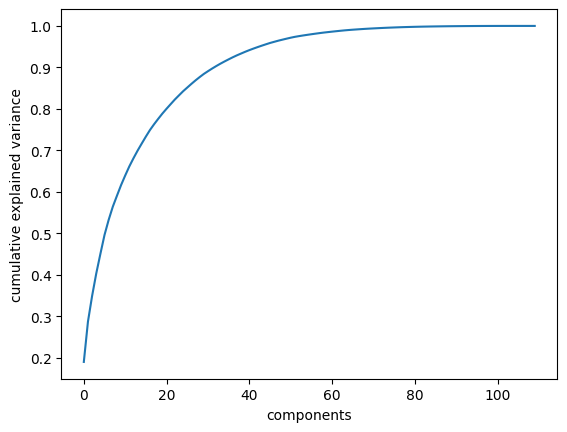

In [64]:
pca = PCA()
pca.fit_transform(DF_final)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('components')
plt.ylabel('cumulative explained variance')
# Show snippet of reduced DataFrame.


We'd like to capture 90% of the variance of the original dataset. This way we can significantly decrease the dimensionality, while maintaining most of the variance.

In [68]:
threshold = 0.9
index = np.argmax(np.cumsum(pca.explained_variance_ratio_)>threshold)
print(f'The amount of PCs required to capture 90% of the variance = {index+1}')

The amount of PCs required to capture 90% of the variance = 33


<h2>Re-enter the previously removed columns</h2>

In [ ]:
df_reduced.insert(0, "MolecularStructure", DF3["MolecularStructure"])
df_reduced.insert(102, "ALDH1_inhibition", DF3["ALDH1_inhibition"])

# Show snippet of final df_reduced.
df_reduced.head()

<h2>Export the final df_reduced as csv for further use</h2>

In [ ]:
df_reduced.to_csv("reduced_scaled_list_of_molecs.csv")